# Multivariate Statistics: control charts

Date: June 2018  
Author: [Alvaro Calle Cordon](www.linkedin.com/in/alvarocallecordon)  
Notebook uses Python 3.0

References:

- [qcc R package for statistical quality control charts](https://cran.r-project.org/web/packages/qcc/vignettes/qcc_a_quick_tour.html)
- [A quick tour of qcc](https://cran.r-project.org/web/packages/qcc/vignettes/qcc_a_quick_tour.html#multivariate-quality-control-charts)
- [An Investigation of Some Characteristics of Univariate and Multivariate Control Charts](http://www2.stat-athens.aueb.gr/~jpan/diatrives/Maravelakis/Index.html)
- [Multivariate Statistical Quality Control Using R](https://sites.google.com/site/edgarsantosfernandez/)
- [StackExchange: Multivariate Control Chart](https://stats.stackexchange.com/questions/107562/multivariate-control-chart)

### Setup

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
from scipy.special import gamma
import statsmodels.api as sm

# plots in the notebook
%matplotlib inline

import rpy2.rinterface

# Load extension that let us use magic function `%R`
%load_ext rpy2.ipython

# fire ipython console
#%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Customizations

In [3]:
# set default styles for plotting via pandas, seaborn and matplotlib
#pd.set_option('display.mpl_style', 'default')
#pd.set_option('display.notebook_repr_html', True)
#sns.set(style='darkgrid')
#cmap_clrbld = ['#777777','#E69F00','#56B4E9','#D3C511','#009E73','#8D42F0','#0072B2','#D55E00','#CC79A7']
#plt.rcParams['axes.color_cycle'] = cmap_clrbld
#plt.rcParams['figure.figsize'] = 8, 6

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
#matplotlib.style.use('classic')

np.random.seed(1)   

# set font format
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12}

In [4]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
#%pwd

### QCC R library

The `qcc` package for the R statistical environment allows to:
- plot Shewhart quality control charts for continuous, attribute and count data
- plot Cusum and EWMA charts for continuous data
- draw operating characteristic curves
- perform process capability analyses
- draw Pareto charts and cause-and-effect diagrams

In [6]:
%R install.packages("qcc"); 
%R install.packages("ggplot2");

In [7]:
%R library(ggplot2); library(qcc);

### Univariate Shewhart Control Chart

Assume that we have a variable that is normally distributed with mean $\mu$ and standard deviation $\sigma$. We assume that $\mu$ and $\sigma$ are both known. Let $x_1, x_2, \ldots, x_n$ be a sample of $n$ i.i.d. observations drawn from our production process. Then the average of this sample $\bar{x}$ is distributed as a normal variable with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$. Therefore, we can use as control limits for each sample:

$$
\begin{align}
UCL & = \mu + Z_{\alpha/2}\ \sigma/\sqrt{n}\\
LCL & = \mu - Z_{\alpha/2}\ \sigma/\sqrt{n}
\end{align}
$$

where UCL and LCL are the upper and lower control limits respectively, $Z_{\alpha/2}$ is the inverse of the normal cumulative distribution function for probability $\alpha/2$ and $\alpha$ is the probability that an in-control sample will plot outside these limits. If all the points (samples) plot inside the control limits we claim that we have an in-control process.

In real world we usually do not know the values of $\mu$ and $\sigma$. Consequently, we have to estimate them. Therefore, the control limits in such a case will not be fixed numbers, but rather random variables. In this case Shewhart chart for the mean are:

$$
\begin{align}
UCL & = \hat\mu + k\ \hat\sigma/\sqrt{n}\\
LCL & = \hat\mu - k\ \hat\sigma/\sqrt{n}
\end{align}
$$

where $\hat\mu$ and $\hat\sigma$ are the estimates for the mean and the standard deviation, respectively and $k$ is a constant used to specify the width of the control limits usually taken to be equal to 3.

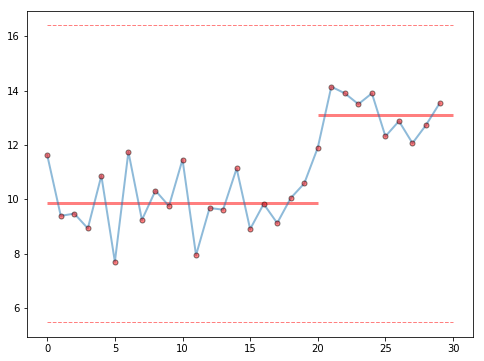

In [8]:
nsigma = 3

s1 = 20
s2 = 10

x1 = np.random.normal(loc=10, scale=1, size=s1)
x2 = np.random.normal(loc=13, scale=1, size=s2)
x = np.append(x1, x2)

# data
plt.plot(x, marker='o', mec='k', mfc='red', ms=5, lw=2, alpha=0.5)
plt.hlines(y=np.mean(x1), xmin=0, xmax=s1, colors='r', linestyles='-', linewidth=3, alpha=0.5)
plt.hlines(y=np.mean(x2), xmin=s1, xmax=s1+s2, colors='r', linestyles='-', linewidth=3, alpha=0.5)

# Shewhart univariate control limits for x:
UCL = np.mean(x) + nsigma*np.std(x)
LCL = np.mean(x) - nsigma*np.std(x)
plt.hlines(y=UCL, xmin=0, xmax=s1+s2, colors='r', linestyles='--', linewidth=1, alpha=0.5)
plt.hlines(y=LCL, xmin=0, xmax=s1+s2, colors='r', linestyles='--', linewidth=1, alpha=0.5)

We now use the R package `qcc`

In [9]:
# load data x in the R environment
%R -i x

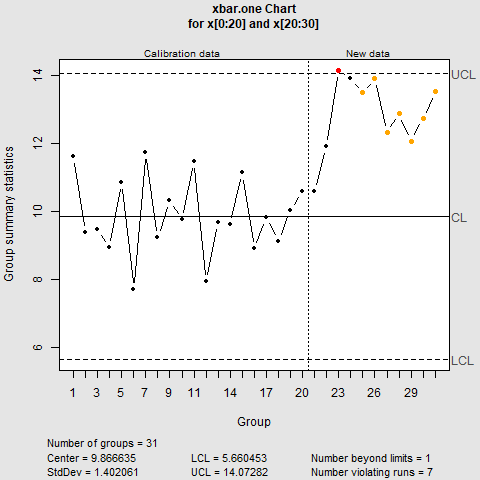

In [10]:
%%R

# Shewhart chart
qcc(x[0:20], type = "xbar.one", newdata=x[20:30])

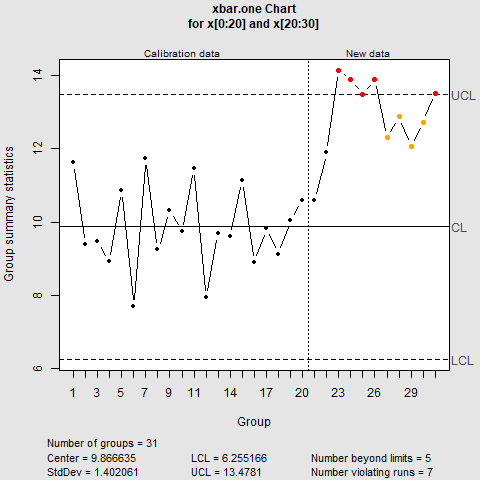

In [11]:
%%R

# Shewhart chart (alpha=0.99)
qcc(x[0:20], type = "xbar.one", newdata=x[20:30], confidence.level=0.99)

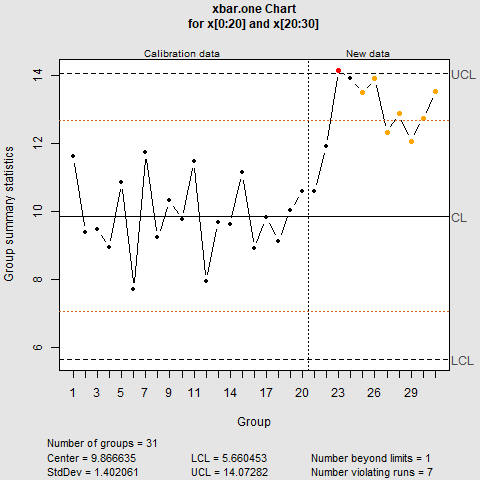

In [12]:
%%R

# Add warning limits at 2 std. deviations:
q1 <- qcc(x[0:20], type="xbar.one", newdata=x[20:30], plot=FALSE)
(warn.limits <- limits.xbar(q1$center, q1$std.dev, q1$sizes, 2))

plot(q1, restore.par = FALSE)
abline(h = warn.limits, lty = 3, col = "chocolate")

### CUMSUM control chart

For small shifts the Shewhart control chart is not very effective. We can see in the figure bellow that the limits are able to detect a change and it might be out of control.

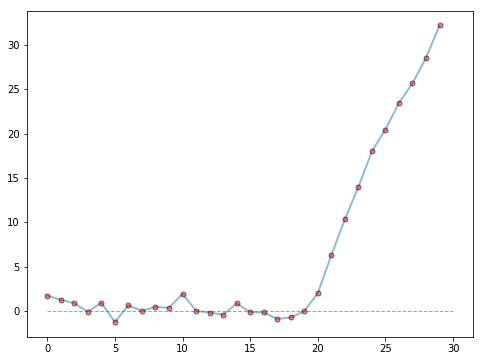

In [13]:
# cumulative sum chart
diff = x - np.mean(x1)
cumsum = np.cumsum(diff)
plt.plot(cumsum, marker='o', mec='k', mfc='r', ms=5, lw=2, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=s1+s2, colors='r', linestyles='--', linewidth=1, alpha=0.5)

The tabular cusum works by accumulating derivations from $\mu_0$ that are above target with one statistic $C^{+}_i$ and accumulating derivations from $\mu_0$ that are below target with another statistic $C^{-}_i$. The statistics $C^{+}_i$ and $C^{-}_i$ are called one-sided upper and lower cusums, respectively.

They are computed as follows:

$$
\begin{align}
C_i^{+} &= \text{max}\left[ 0, x_i - (\mu_0 + K) + C_{i-1}^{+} \right]\, ,\\
C_i^{-} &= \text{max}\left[ 0, (\mu_0 - K) - x_i + C_{i-1}^{-} \right]\, ,
\end{align}
$$

where the starting values are  $C^{+}_0 = C^{-}_0 = 0$. $K$ is usually called the _reference value_ (or the _allowance_), and it is often chosen about halfway between the target $\mu_0$ and the outof-
control value of the mean $\mu_1$ that we are interested in detecting quickly. If the shift we are testing is $\delta$, then we want to test if $\mu_1 = \mu_0 + \delta\ \sigma$, or $\delta = |\mu_1 - \mu_0|/\sigma$, and then $K$ is taken to be:
$$
K = \frac{\delta}{2}\ \sigma = \frac{|\mu_1 - \mu_0|}{2}\, .
$$

$C^{+}_i$ and $C^{-}_i$ accumulate deviations from the target value $\mu_0$ that are greater than $K$,
with both quantities reset to zero on becoming negative. If either $C^{+}_i$ or $C^{-}_i$  exceed the _decision interval_ $H$, the process is considered to be out of control. The decision interval is usually taken to be $5\sigma$.

In [14]:
def TabulaCumsums(x, delta):
    """
    Tabular cumulative sums
    """
    mu0 = np.mean(x)
    mu1 = mu0 + delta*np.std(x)
    
    K = abs(mu1 - mu0)/2.
    
    return {"Cp": np.cumsum(np.maximum(0, x - (mu0 + K))),
            "Cm": np.cumsum(np.maximum(0, (mu0 - K) - x))}

In [15]:
TabulaCumsums(x1, 1)

{'Cp': array([1.20780727, 1.20780727, 1.20780727, 1.20780727, 1.65667681,
        1.65667681, 2.98495048, 2.98495048, 2.98495048, 2.98495048,
        4.03052032, 4.03052032, 4.03052032, 4.03052032, 4.74775167,
        4.74775167, 4.74775167, 4.74775167, 4.74775167, 4.91402879]),
 'Cm': array([0.        , 0.        , 0.        , 0.38970126, 0.38970126,
        2.00797259, 2.00797259, 2.08591212, 2.08591212, 2.08591212,
        2.08591212, 3.46278546, 3.46278546, 3.46278546, 3.46278546,
        3.87940936, 3.87940936, 4.07400042, 4.07400042, 4.07400042])}

We now use the R package `qcc`

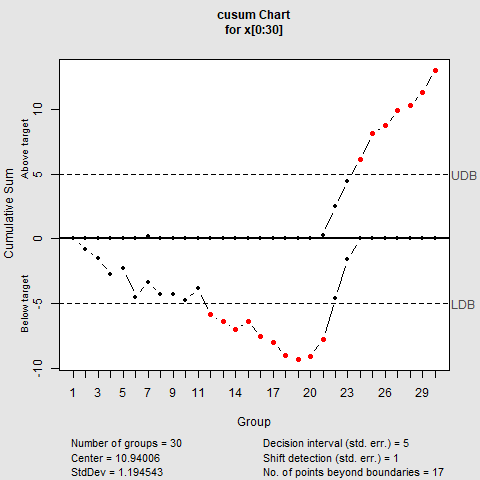

In [16]:
%%R

# Cumsum chart
q1 <- cusum(x[0:30], decision.interval=5, se.shift=1)

### The Exponentially Weighted Moving Average (EWMA) Control Chart

The exponentially weighted moving average (EWMA) control chart is also a good alternative to the Shewhart control chart when we are interested in detecting small shifts. The performance of the EWMA control chart is approximately equivalent to that of the cumulative sum control chart, and in some ways it is easier to set up and operate. As with the cusum, the EWMA is typically used with individual observations, and so, consequently, we will discuss that case first. We will also give the results for rational subgroups of size $n > 1$.

The exponentially weighted moving average is defined as:

$$
z_i = \lambda x_i + (1 - \lambda)\ z_{i-1}\, ,
$$

where $0 < \lambda \leq 1$ is a constant and the starting value (required with the first sample at $i=1$) is the process target, so that $z_0 = \mu_0$. Sometimes the average of preliminary data is used as the starting value of the EWMA, so that, $z_0=\bar{x}$.

If the observations $x_i$ are independent random variables with variance $\sigma^2$, then the variance of $z_i$ is

$$
\sigma_{z_i}^2 = \sigma^2\left(\frac{\lambda}{2-\lambda} \right)\left[1 - (1-\lambda)^{2i} \right]\, .
$$

Therefore, the EWMA control chart would be constructed by plotting $z_i$ versus the sample number $i$ (or time). The center line and control limits for the EWMA control chart are as follows.

$$
\begin{align}
\text{UCL} &= \mu_0 + L\sigma
\sqrt{\frac{\lambda}{(2-\lambda)}\left[ 1 - (1 - \lambda)^{2i} \right]}\, ,\\
\text{Center line} &= \mu_0\, ,\\
\text{LCL} &= \mu_0 - L\sigma
\sqrt{\frac{\lambda}{(2-\lambda)}\left[ 1 - (1 - \lambda)^{2i} \right]}\, ,\\
\end{align}
$$
where the factor $L$ is the width of the control limits.

In [17]:
def EWMA(xser, mu0=None, sig0=None, lamda=0.1, L=3):
    """
    Exponentially Weighted Moving Average of time series x
    """
    
    if mu0 is None:
        mu0 = np.mean(x)        
    if sig0 is None:
        sig0 = np.std(x)

    z = [mu0]*len(x)
    UCL = [mu0]*len(x)
    LCL = [mu0]*len(x)
    for i in range(1,len(x)):
        z[i] = lamda*x[i] + (1-lamda)*z[i-1]
        UCL[i] = mu0 + L*sig0*np.sqrt(lamda/(2-lamda)*(1 - (1 - lamda)**(2*i)))
        LCL[i] = mu0 - L*sig0*np.sqrt(lamda/(2-lamda)*(1 - (1 - lamda)**(2*i)))
        
    return {"z": z,
            "UCL": UCL,
            "LCL": LCL}

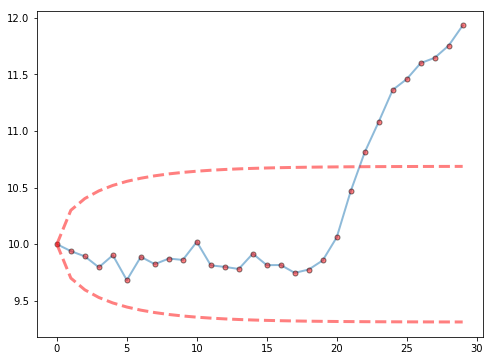

In [18]:
res = EWMA(x, mu0=10, sig0=1)

plt.plot(res["z"], marker='o', mec='k', mfc='red', ms=5, lw=2, alpha=0.5)
plt.plot(res["UCL"], 'r--', linewidth=3, alpha=0.5)
plt.plot(res["LCL"], 'r--', linewidth=3, alpha=0.5)

We now use the R package `qcc`

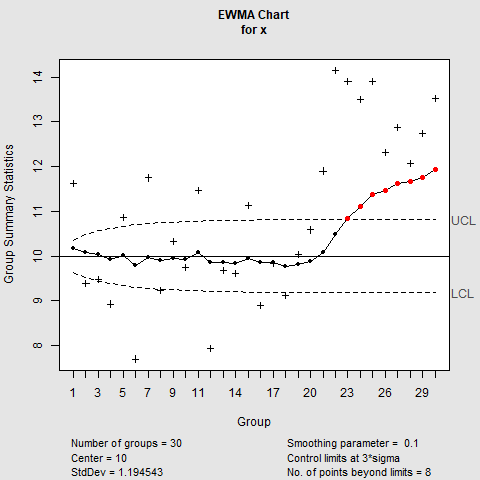

In [19]:
%%R

q1 <- ewma(x, lambda=0.1, nsigmas=3, center=10)

## Multivariate Process Monitoring and Control

- The control ellipsoid or $\chi^2$ control chart
- The $T^2$ or Hotelling chart
- The Multivariate Exponentially Weighted Moving Average (MEWMA) chart
- The Multivariate Cumulative Sum (MCUSUM) chart
- The chart based on Principal Components Analysis (PCA)

### [Multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

The multivariate normal distribution of a k-dimensional random vector $\mathbf{x}= (x_1, x_2, \ldots, x_k)^T$ can be written in the following notation:
$$
\mathbf{x}\ \sim\ \mathcal{N}(\boldsymbol\mu,\, \boldsymbol\Sigma),
$$
or to make it explicitly known that $\mathbf{x}$ is k-dimensional,
$$
\mathbf{x}\ \sim\ \mathcal{N}_k(\boldsymbol\mu,\, \boldsymbol\Sigma),
$$
with k-dimensional mean vector
$$
\boldsymbol\mu = \operatorname{E}[\mathbf{x}] = ( \operatorname{E}[x_1], \operatorname{E}[x_2], \ldots, \operatorname{E}[x_k])^{\rm T},
$$
and $k\times k$ covariance matrix
$$
\boldsymbol\Sigma = \operatorname{E} [(\mathbf{x} - \boldsymbol \mu)( \mathbf{x} - \boldsymbol \mu)^{\rm T}] =  [ \operatorname{Cov}[x_i, x_j]; 1 \le i,j \le k ].
$$

The multivariate normal distribution is said to be "non-degenerate" 

When covariance matrix is symmetric, i.e. $\boldsymbol\Sigma$ is positive definite, the distribution has probability density given by
$$
\begin{align}
f_{\mathbf X}(x_1,\ldots,x_k)
& = \frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}
\end{align}
$$

where ${\mathbf x}$ is a real k-dimensional column vector and $|\boldsymbol\Sigma|\equiv \operatorname{det}\boldsymbol\Sigma$ is the determinant of $\boldsymbol\Sigma$. The equation above reduces to that of the univariate normal distribution if $\boldsymbol\Sigma$ is a $1 \times 1$ matrix (i.e. a single real number).

The descriptive statistic $\sqrt{({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})}$ is known as the Mahalanobis distance, which represents the distance of the test point ${\mathbf x}$ from the mean ${\boldsymbol\mu}$. Note that in case when $k = 1$, the distribution reduces to a univariate normal distribution and the Mahalanobis distance reduces to the absolute value of the standard score.

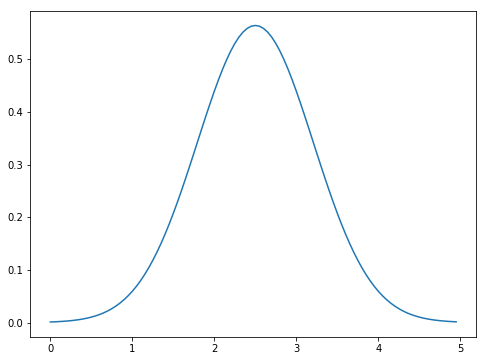

In [20]:
x = np.linspace(0, 5, 100, endpoint=False)
y = stats.multivariate_normal.pdf(x, mean=2.5, cov=0.5)
plt.plot(x, y); plt.show()

** [Mahalanobis distance: ellipses](https://en.wikipedia.org/wiki/Mahalanobis_distance) **

Outliers are calculated using the Mahalanobis distance. Given two points $\vec{x} = (x_1, x_2, \ldots, x_k)^T$ e $\vec{y} = (y_1, y_2, \ldots, y_k)^T$ in a $k$-dimensional space, the Mahalanobis distance between these two points represents a dissimilarity measure of the observations, and is given by:

$$
\begin{eqnarray}
d(\vec{x}, \vec{y}) &=& \sqrt{(\vec{x} - \vec{y})^T\ \Sigma^{-1}\ (\vec{x} - \vec{y})}\, .
\end{eqnarray}
$$

One can also define the distance between a given observation of a set of observations with mean $\vec{\mu} = (\mu_1, \mu_2, \ldots, \mu_k)^T$ and the center of mass of the distribution as:
$$
\begin{eqnarray}
r &=& \sqrt{(\vec{x} - \vec{\mu})^T\ \Sigma^{-1}\ (\vec{x} - \vec{\mu})}\, ,
\end{eqnarray}
$$
where the mean of the distribution represents the center of mass and the covarianza $\Sigma$ its shape.

If $\vec{x}$ follows $\mathcal{N}_k(\vec\mu,\, \boldsymbol\Sigma)$, then $d^2$ and $r^2$ follows $\chi_{\alpha, k}^2$. Therefore,
$$
(\vec{x} - \vec{\mu})^T\ \Sigma^{-1}\ (\vec{x} - \vec{\mu}) \leq \chi_{\alpha, k}^2\, .
$$

We can use the CDF of the $\chi^2$ distribution to determine the probability of an observation being at a distance less or equal to $r$.

- Case $n=2$: for 2-dofs the probability of a point being at a distance $R$ less or equal to a theshold $t$ is:

$$
\begin{eqnarray}
p &=& P(R \leq t) = F_R(t) = 1 - e^{-t^2/2}\, ,
\end{eqnarray}
$$

and then, for two dimensions, the frontier holding a fraction $p$ of the points is:
 
$$
\begin{eqnarray}
t = \sqrt{-2\log(1 - p)}
\end{eqnarray}
$$

- The Mahalanobis distance defines the frontier holding this proportion $p$:

$$
\begin{eqnarray}
\left(\frac{x}{\sigma_x}\right)^2 + \left(\frac{y}{\sigma_y}\right)^2 = t^2
\end{eqnarray}
$$

- The main axes of the ellipse are the Principal Components. These can be obtained by diagonalizing the covariance matrix $\Sigma$ and calculating the eigen-vectors and eigen-values. These can also be calculated by applying the [Cholesky transformation](https://blogs.sas.com/content/iml/2012/02/08/use-the-cholesky-transformation-to-correlate-and-uncorrelate-variables.html)  
  
- General Case: for an arbitrary number of d.o.f (or dimensions), the  Mahalanobis distance can be calculated from the probability of occupation using the quantile function (or inverse CDF) of the $\chi^2$ distribution:

$$
\begin{eqnarray}
Q(p)\,=\,\inf \left\{x\in {\mathbb {R}}:p\leq F(x)\right\} 
\end{eqnarray}
$$

In [21]:
from matplotlib.patches import Ellipse
from scipy.linalg import cholesky

def cov_ellipse(cov, nsig=None):
    """
    Confidence ellipse from the covariance matrix

    Parameters
    ----------
    cov : (2, 2) array
        Covariance matrix.
    nsig : int
        Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle
         in degree for the ellipse.
    """

    val, vec = np.linalg.eigh(cov)
    #width, height = 2 * nsig * np.sqrt(val[:, None])
    width, height = 2 * nsig * np.sqrt(val)    
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

def cholesky_ellipse(cov, nsig=1):
    """
    Confidence ellipse by transform a unit circle using the cholesky decomposition
    
    Parameters
    ----------
    cov : (2, 2) array
        Covariance matrix.
    nsig : int
        Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    E : (100, 2) array
        parametric coordenates of the ellipse.

    """
    
    # Decomposition matrix (cov = LU)
    L = cholesky(cov, lower=True)
    #U = cholesky(cov, lower=False)
        
    t = np.linspace(0,2*np.pi,100) # ellipse with 100 points
    C = [np.cos(t), np.sin(t)] # unit circle centered at (0, 0)
    
    E = np.dot(nsig, np.dot(L, C))# get nsigma ellipse

    return E

### Correlated variables

Let's see the effect of correlations and the impact when defining Quality Control Limits

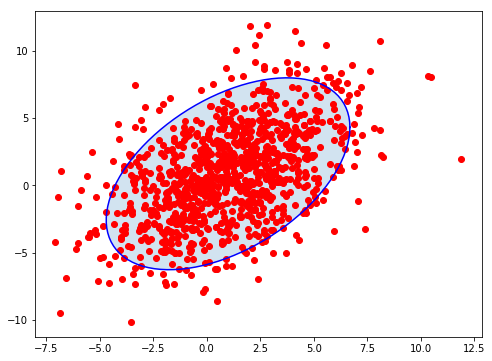

In [22]:
# Example usage -----------------------
# Generate some random, correlated data
points = np.random.multivariate_normal(mean=(1,1), cov=[[0.4, 9],[9, 10]], size=1000)

# Plot the raw points...
x, y = points.T

X = pd.DataFrame({'x':x, 'y':y})

mu = X.mean()
cov = X.cov()

x = X.as_matrix()[:, 0]
y = X.as_matrix()[:, 1]

xc = mu.as_matrix()[0]
yc = mu.as_matrix()[1]

width, height, theta = cov_ellipse(cov, nsig=2)
ellip = Ellipse(xy=mu, width=width, height=height, angle=theta,
                linewidth=1, zorder=1, alpha=0.2, linestyle='-')
chol = cholesky_ellipse(cov, 2) # one standard deviation

plt.figure()
plt.plot(x, y, 'ro')
ax = plt.gca()
ax.add_artist(ellip)
plt.plot(chol[0] + xc, chol[1] + yc, 'b-')
plt.show()

**Case Study**

The difficulty with using independent univariate control charts can be illustrated in the following figure. Here only two quality variables (x, y) are considered for ease of illustration. 

Suppose that, when the process is in a state of statistical control, where only common cause variation is present, x and y follow a multivariate Normal distribution and are correlate ($\rho_{x,y} = -0.94$). The ellipse represents a contour for the "in-control" process, with 99% confidence limits (3-sigma), and the points represent a set of observations from this distribution. The same observations are also plotted as individual Shewhart charts on x and y versus sample number (time) with their corresponding upper (UCL) and lower (LCL) control limits (99% confidence limits). 

Note that by inspection of each of the individual Shewhart charts the process appears to be clearly in a state of statistical control, and none of the individual observations gives any indication of a problem. The only indication of any difficulty is that a customer has complained about the performance of the product corresponding to the point represented as a star in the figure (this point has been generated as a uniform random variate). If only univariate charts were used, one would clearly be confused. The same customer apparently liked all the other lots of product sent to him, many of them with values of x and y much further from target. The true situation is only revealed in the multivariate x vs y plot where it is seen that the lot of product indicated by the star is clearly outside the joint confidence region, and is clearly different from the normal "in-control" population of product.

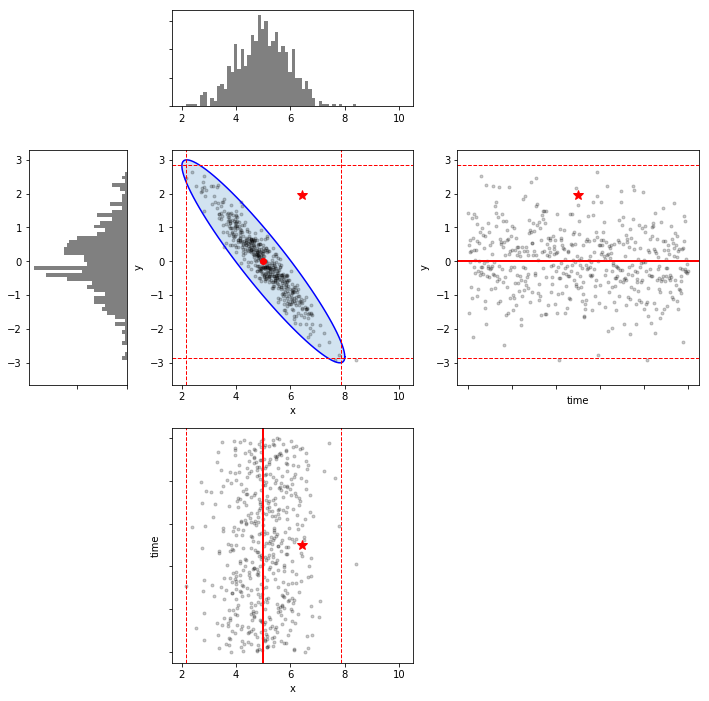

In [23]:
np.random.seed(10)

num_samples = 500 # number of samples over time (equivalen to m)

# The desired mean values of the sample.
mu = np.array([5.0, 0.0])

# The desired covariance matrix.
sx = 1; sy = 1; sxy = -0.94;
Sigma = np.array([[1, sxy/(sx*sy)],
                  [sxy/(sx*sy),  1.]])

# Generate the random samples.
data = np.random.multivariate_normal(mu, Sigma, size=num_samples)

x = data[:,0]
y = data[:,1]

# Set up default x and y limits
xlims = [min(x)*(1-0.25), max(x)*(1+0.25)]
ylims = [min(y)*(1+0.25), max(y)*(1+0.25)]
 
# Set up your x and y labels
xlabel = '$\mathrm{x}$'
ylabel = '$\mathrm{y}$'

# outlier:
x_out = np.random.uniform(mu[0], max(x)/1.05)
y_out = np.random.uniform(mu[1], max(y)/1.05)

# ellipse
nsigma = 3 # number of standard deviations
width, height, theta = cov_ellipse(Sigma, nsig=nsigma)
ellip = Ellipse(xy=mu, width=width, height=height, angle=theta,
                linewidth=1, zorder=1, alpha=0.2, linestyle='-')
chol = cholesky_ellipse(Sigma, nsigma) 

# Shewhart univariate control limits:
xUCL = np.mean(x) + nsigma*np.std(x)
xLCL = np.mean(x) - nsigma*np.std(x)
yUCL = np.mean(y) + nsigma*np.std(y)
yLCL = np.mean(y) - nsigma*np.std(y)

# Plot various projections of the samples
fig = plt.figure(figsize=(12,12), facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(5, 5)
gs.update(wspace=0.45, hspace=0.45)

main_ax = plt.subplot(gs[1:3, 1:3]) # main
x_histo = plt.subplot(gs[0:1, 1:3], yticklabels=[], sharex=main_ax) # x-hist
y_histo = plt.subplot(gs[1:3, 0:1], xticklabels=[], sharey=main_ax) # y-hist
x_serie = plt.subplot(gs[3:5, 1:3], yticklabels=[], sharex=main_ax) # x-ser
y_serie = plt.subplot(gs[1:3, 3:5], xticklabels=[], sharey=main_ax) # y-ser

# scatter plot x-y on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
main_ax.plot(mu[0], mu[1], 'ro')
main_ax.plot(x_out, y_out, 'r*', ms=10)
main_ax.set_xlabel(xlabel)
main_ax.set_ylabel(ylabel)
main_ax.set_xlim(xlims)
main_ax.set_ylim(ylims)

# add confidence level ellipse
main_ax.add_artist(ellip)
main_ax.plot(chol[0]+mu[0], chol[1]+mu[1], 'b-')

# add Shewhart univariate control limits for individual variables:
main_ax.axvline(xUCL, ymin=0, ymax=num_samples, ls='--', c='r', lw=1)
main_ax.axvline(xLCL, ymin=0, ymax=num_samples, ls='--', c='r', lw=1)
main_ax.axhline(yUCL, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)
main_ax.axhline(yLCL, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)

# histograms
x_histo.hist(x, 50, histtype='stepfilled', orientation='vertical', color='grey')
y_histo.hist(y, 50, histtype='stepfilled', orientation='horizontal', color='grey')
y_histo.invert_xaxis()

# y time-series
y_serie.plot(y, 'ok', markersize=3, alpha=0.2)
y_serie.plot(num_samples/2, y_out, 'r*', ms=10)
y_serie.axhline(mu[1], xmin=0, xmax=num_samples, ls='-', c='r', lw=2)
y_serie.axhline(yUCL, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)
y_serie.axhline(yLCL, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)
#y_serie.text(num_samples, max(y), "UCL", fontsize=12)

y_serie.set_ylabel(ylabel)
y_serie.set_xlabel(r'time')

# x time-series
x_serie.plot(x, np.arange(num_samples), 'ok', markersize=3, alpha=0.2, )
x_serie.plot(x_out, num_samples/2, 'r*', ms=10)
x_serie.axvline(x=mu[0], ymin=0, ymax=num_samples, ls='-', c='r', lw=2)
x_serie.axvline(xUCL, ymin=0, ymax=num_samples, ls='--', c='r', lw=1)
x_serie.axvline(xLCL, ymin=0, ymax=num_samples, ls='--', c='r', lw=1)
x_serie.set_ylabel(r'time')
x_serie.set_xlabel(xlabel)
x_serie.set_xlim(xlims)

plt.show()

### Multivariate $\chi^2$ control chart

Two disadvantages are associated with control ellipses. 

- The first is that the time sequence of the plotted points is lost. This could be overcome by numbering the plotted points or by using special plotting symbols to represent the most recent observations.
- The second and more serious disadvantage is that it is difficult to construct the ellipse for more than two quality characteristics. To avoid these difficulties, it is customary to plot the values of $\chi^2$ (the square of the Mahalanobis distance), 

$$
d^2 = (\mathbf{x} - \mathbf{\mu})^T\ \Sigma^{-1}\ (\mathbf{x} - \mathbf{\mu}) \leq \chi_{\alpha, k}^2\, ,
$$

for each sample on a control chart with only an upper control limit at UCL=$\chi_{\alpha, k}^2$. In this case, the time sequence of the data is preserved by this control chart, so that runs or other nonrandom patterns can be investigated.

In [24]:
def Mahalanobis(X, mu=None, Sigma=None):
    """
    Mahalanobis distance
    Calculates the distance of a p-dimensional set of observation (point) to the center of the distribution.
    The center of the distribution may be passed through the vector mu, but if the center is not provided,
    it uses the sample mean of X to calculate it.
    
    Inputs:    
    X - matrix of data with dim(m, p) m:number of observations, p:number of variables
    mu - array of length p with the mean of the multidimensional normal distribution
    Sigma - covariance matrix of the multivariate distribution
    
    Outputs:
    d(X, mu) - array of length m of distance of each observation (point) to the center of the distribution
    """
    
    if mu is None:
        mu = X.mean(axis=0)
    
    if Sigma is None:
        Sigma = np.cov(X.T)
        
    SigmaInv = np.linalg.inv(Sigma)
    
    d = np.sqrt(np.diag(np.dot(np.dot(X - mu, SigmaInv), (X - mu).T)))
    
    return d

In [25]:
# Percent point function (inverse of cdf - percentiles)
q = 1 - 0.05 # percentile: q = 1 - p-value (alpha)
df = 7
print(stats.chi2.ppf(q, df))

for p in [0.95, 0.90, 0.80, 0.70, 0.50, 0.30, 0.20, 0.10, 0.05, 0.01, 0.001]:    
    q = 1 - p
    print(p, stats.chi2.ppf(q, 2))

14.067140449340167
0.95 0.10258658877510105
0.9 0.21072103131565262
0.8 0.4462871026284194
0.7 0.7133498878774648
0.5 1.3862943611198912
0.3 2.407945608651872
0.2 3.2188758248682015
0.1 4.605170185988092
0.05 5.99146454710798
0.01 9.21034037197618
0.001 13.815510557964272


Set level of significance (p-value)

In [26]:
# level of significance (p-value):
q = 0.99# 99% of points in control
p = 1 - q # alpha = 1 - q

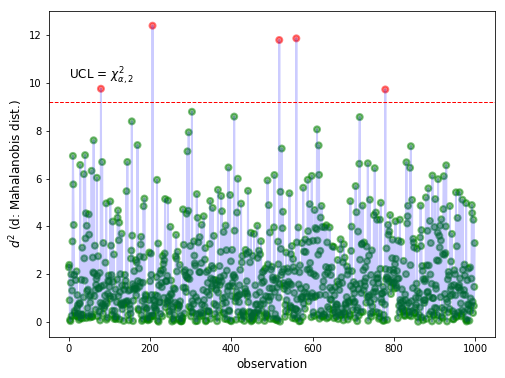

In [27]:
np.random.seed(10)

num_samples = 1000 # number of samples over time (equivalen to m)

# The desired mean values of the sample.
mu = np.array([5.0, 0.0])

# The desired covariance matrix.
sx = 1; sy = 1; sxy = -0.94;
Sigma = np.array([[1, sxy/(sx*sy)],
                  [sxy/(sx*sy),  1.]])

# Generate the random samples.
X = np.random.multivariate_normal(mu, Sigma, size=num_samples)

d = Mahalanobis(X, mu, Sigma)

# Chi2 UCL given p-value:
chi2 = stats.chi2.ppf(q, 2)

# plot Chi2 chart:
t = np.arange(0, num_samples, 1)
col = np.where(d**2 <= chi2,'g', 'r')
plt.scatter(t, d**2, c=col, lw=2, alpha=0.5)
plt.plot(t, d**2, 'b-', lw=2, alpha=0.2)
plt.axhline(y=chi2, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)
plt.text(0, chi2*1.1, r'UCL = $\chi_{\alpha, 2}^2$', fontsize=12)
plt.xlabel("observation", fontsize=12)
plt.ylabel("$d^2$ (d: Mahalanobis dist.)", fontsize=12)
plt.show()

### The Hotelling $T^2$ control chart

The Hotelling $T^2$ control chart for monitoring the mean vector of the process is a direct analog of the univariate Shewhart chart.

Case of individual observations $n=1$:

Supose that there are $m$ samples, each of size $n=1$, and that $p$ is the number of quality characteristics observed in each sample. Let $bar{x}$ and $S$ be the sample mean vector and covariance matrix, respectively, of these observations. The Hotelling $T^2$ statistic is given by, 

$$
T^2 = (\mathbf{x} - \mathbf{\bar{x}})^T\ S^{-1}\ (\mathbf{x} - \mathbf{\bar{x}})\, .
$$

In multivariate quality control applications one must be careful to select the control limits for Hotelling's $T^2$ statistic. Recall that there are two distinct phases of control chart usage:

_Phase I_ : is the use of the charts for establishing control; that is, testing whether the process was in control when the $m$ preliminary subgroups were drawn and the sample statistics $\bar{x}$ and $\mathbf{S}$ computed. The objective in `phase I` is to obtain an in-control set of observations so that control limits can be established for `phase II`, which is the monitoring of future production. 

The `phase I` control limits for the $T^2$ control chart are (individual observations, Tracy et al. (1992)):

$$
\begin{align}
\text{UCL} &= \frac{(m-1)^2}{m}\beta_{\alpha,\ p/2,\ (m-p-1)/2}\, ,\\
\text{LCL} &= 0\, ,
\end{align}
$$

where $\beta$ is the beta distribution with $p/2$ and $(m-p-1)/2$ degree of freedom at significance level alpha ($\alpha$).

The `phase II` control limits are given by (individual observations)

$$
\begin{align}
\text{UCL} &= \frac{p(m+1)(m-1)}{m(m-p)}F_{\alpha,\ p,\ m-p}\, ,\\
\text{LCL} &= 0\, ,
\end{align}
$$

It is worth noticing that when $\mu$ and $\Sigma$ are estimated from a large number of preliminary samples, it is customary to use the previously seen $\chi^2$ upper control limit, namelly, $\text{UCL} = \chi_{\alpha, p}^2$ in both phase I and phase II.

In many situations a large number of preliminary samples would be required before the exact phase II control limits are well approximated by the chi-square limits. The recommended values of $m$ are always greater than 20 preliminary samples, and often more than 50 samples. Some authors observe that these recommended sample sizes are probably too small. Sample sizes of at least 200 are desirable when estimating the phase II limits.

Therefore, when the number of preliminary samples $m$ is large—say, $m > 100$ many practitioners use an approximate control limit, either

$$
\begin{align}
\text{UCL} &= \frac{p(m-1)}{m-p}F_{\alpha, p, m-p}\, ,
\end{align}
$$

or 

$$
\begin{align}
\text{UCL} &= \chi_{\alpha, p}^2\, .
\end{align}
$$

In [28]:
def Hotelling(X, mu=None, Sigma=None):
    """
    Hotelling's T2 statistics
    Calculates the Hotelling's T2 statistics of a p-dimensional set of observation (point).
    
    Inputs:
    X - matrix of data with dim(m, p) m:number of observations, p:number of variables
    mu - array with the mean of the distribution
    Sigma - covariance matrix of the distribution

    Output:
    T2 - array with Hotelling's T2 statistics of the set of observations.
    """
    
    if mu is None:
        mu = X.mean(axis=0)
    if Sigma is None:        
        Sigma = np.cov(X.T)
        
    SigmaInv = np.linalg.inv(Sigma)
    
    T2 = np.diag(np.dot(np.dot(X - mu, SigmaInv), (X - mu).T))
    
    return T2

def Hotelling_UCL(m, p, alpha=0.01, phase='I', large_sample=False):
    """
    Hotelling's T2 UCL
    Calculates the Upper Control Limit for the Hotelling's T2 control chart.
    If m > 200, it may take an approximation.
    
    Input:    
    m - number of samples (observations)
    p - number of (correlated) variables
    alpha - p-value
    phase - string specifying phase of the control (I or II)
    large_sample - boolean, if true, takes approximation for UCL

    Output:
    UCL - Upper Control Limit of chart
    """

    # level of significance (p-value)
    q = 1 - alpha

    if m > 200 and large_sample==True:
        UCL = stats.chi2.ppf(q, p) # Chi2 UCL        
    else:
        if phase=='I':
                UCL = (m-1)**2/m * stats.beta.ppf(q, p/2., (m-p-1)/2.)
        elif phase=='II':
                UCL = p*(m+1)*(m-1)/m/(m-p) * stats.f.ppf(q, p, m-p)
        
    return UCL

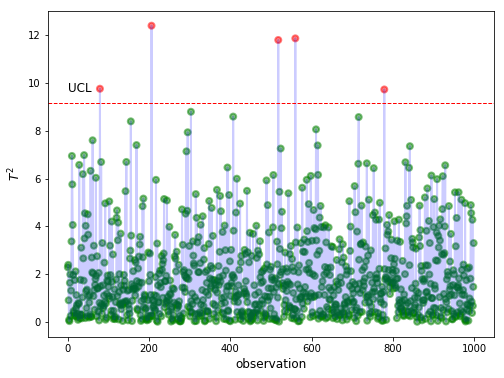

In [29]:
np.random.seed(10)

num_samples = 1000 # number of samples over time (equivalen to m)

# The desired mean values of the sample.
mu = np.array([5.0, 0.0])

# The desired covariance matrix.
sx = 1; sy = 1; sxy = -0.94;
Sigma = np.array([[1, sxy/(sx*sy)],
                  [sxy/(sx*sy),  1.]])

# Generate the random samples.
X = np.random.multivariate_normal(mu, Sigma, size=num_samples)

#  Hotelling's T2 statistic:
T2 = Hotelling(X, mu, Sigma)

#  Hotelling's UCL:
UCL = Hotelling_UCL(num_samples, X.shape[1], alpha=0.01, phase='I')

# plot Hotelling(X) chart:
t = np.arange(0, num_samples, 1)
col = np.where(T2 <= UCL,'g', 'r')
plt.scatter(t, T2, c=col, lw=2, alpha=0.5)
plt.plot(t, T2, 'b-', lw=2, alpha=0.2)
plt.axhline(y=UCL, xmin=0, xmax=num_samples, ls='--', c='r', lw=1)
plt.text(0, UCL*1.05, r'UCL', fontsize=12)
plt.xlabel("observation", fontsize=12)
plt.ylabel("$T^2$", fontsize=12)
plt.show()

We now use the R package `qcc`

In [30]:
# load data X in the R environment
%R -i X 
%R print(class(X))
%R print(nrow(X))
%R X[1:nrow(X), 1]

array([3.81242934, 6.52059065, 4.26333256, 4.75730257, 4.96553179,
       4.78189085, 6.12858175, 4.85192553, 6.14282975, 3.35087292,
       6.64587552, 5.15103974, 4.18299913, 5.14448942, 5.37335837,
       5.16813379, 4.78682727, 3.74508076, 4.54735924, 3.6357375 ,
       4.28897454, 5.84047887, 5.75559006, 5.38808382, 4.41785523,
       5.07558638, 5.65437613, 4.20576606, 2.80039896, 5.04784407,
       5.14177101, 3.76741131, 4.98821931, 3.72392827, 5.33590561,
       4.76530113, 5.38384077, 5.11741318, 6.59301557, 5.89111699,
       3.34712909, 6.78954515, 4.69562924, 5.11622117, 4.44057951,
       3.95139017, 4.93039819, 4.45785057, 5.49032371, 3.84696939,
       4.55391867, 5.99032355, 5.07287878, 5.43842433, 4.16749376,
       4.62994064, 2.50395356, 5.24767247, 5.45683066, 4.45073293,
       5.33574298, 4.20948578, 3.69764358, 4.02183081, 3.48400523,
       5.03082717, 5.68464711, 6.16889273, 3.68540222, 3.29527825,
       5.04784262, 4.96404041, 4.90758002, 6.03879954, 4.86925

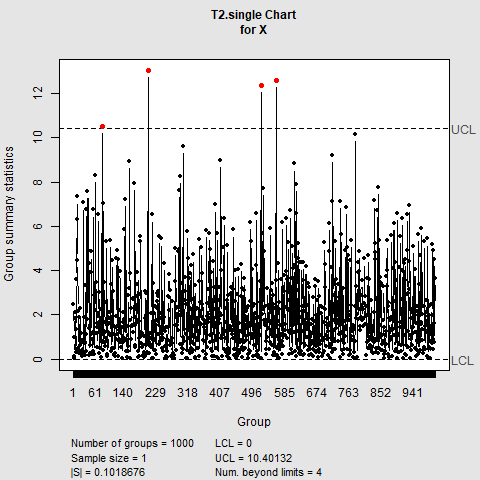

In [31]:
%%R

q <- mqcc(X, type = "T2.single")

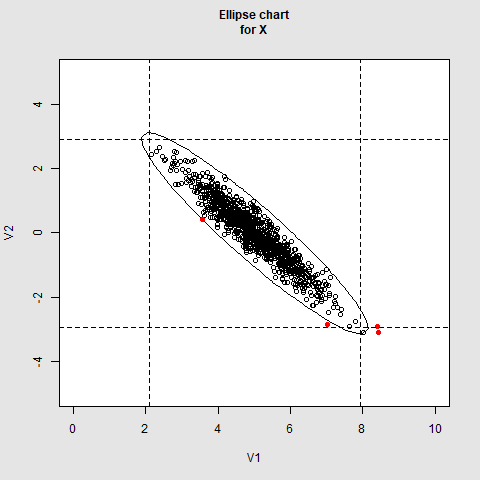

In [32]:
%%R

ellipseChart(q)
#ellipseChart(q, show.id = TRUE)

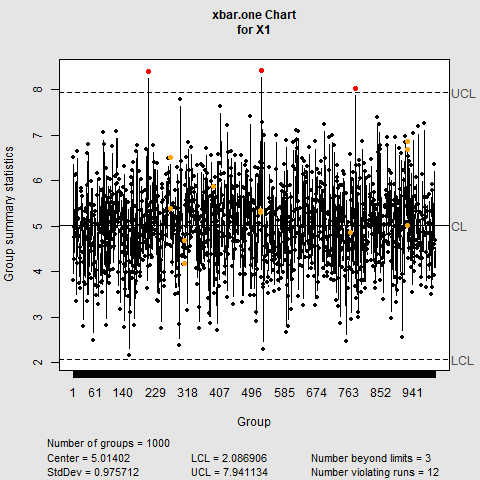

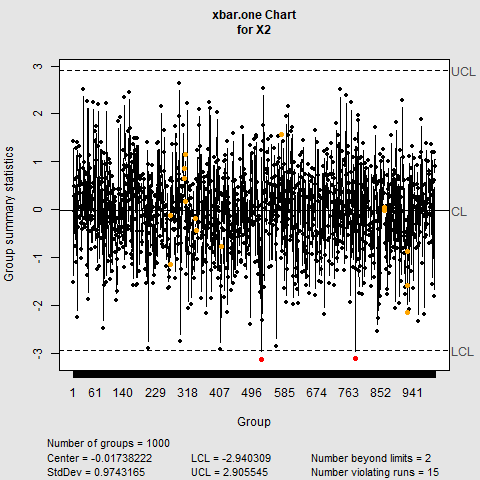

In [33]:
%%R

# Ryan (2000) discussed Xbar-charts for single variables computed adjusting the confidence level of the T^2

X1 <- X[1:nrow(X), 1]
X2 <- X[1:nrow(X), 2]

q1 <- qcc(X1, type = "xbar.one", confidence.level = q$confidence.level^(1/2))
q2 <- qcc(X2, type = "xbar.one", confidence.level = q$confidence.level^(1/2))

### Multivariate CUMSUM and EWMA control charts

The chi-square and $T^2$ charts described in the previous section are Shewhart-type control charts. That is, they use information only from the current sample, so consequently, they are relatively insensitive to small and moderate shifts in the mean vector. As we noted, the $T^2$ chart can be used in both phase I and phase II situations. Cumulative sum (cusum) and
EWMA control charts were developed to provide more sensitivity to small shifts in the univariate case, and they can be extended to multivariate quality control problems. As in the univariate case, the multivariate version of these charts are a phase II procedure.

### Multivariate control charts using MSQC R package 

The performing of the multivariate control chart in R can be carried out with the function mult.chart of the MSQC R package which is a general function that allows to compute the most accepted and diversified continuous multivariate chart such as

- $\chi^2$
- Hotelling $T^2$
- MEWMA
- MCUSUM according to Crosier (1988)
- MCUSUM by Pignatiello and Runger (1990)

The selection of the chart to use is done by specifying the argument `type` to "t2", "mewma", "mcusum", or "mcusum2" in the same order previously introduced.

In the function, x must be a matrix or an array and jointly with type are the only compulsory arguments. Other important functionalities are the Phase that can be I or II (being I for default) and the significance level (alpha) fixed in $0.01$.
The covariance matrix (S) and mean vector (Xmv) can be entered to be used in Phase II.

Finally the function mult.chart returns:

- The T2 statistics
- The Upper Control Limit (UCL)
- The sample covariance matrix (S)
- The mean vector (Xmv)
- And if any point falls outside of the UCL and its decomposition

In [34]:
%R install.packages("MSQC"); 
%R library(MSQC);

$\chi^2$ control chart

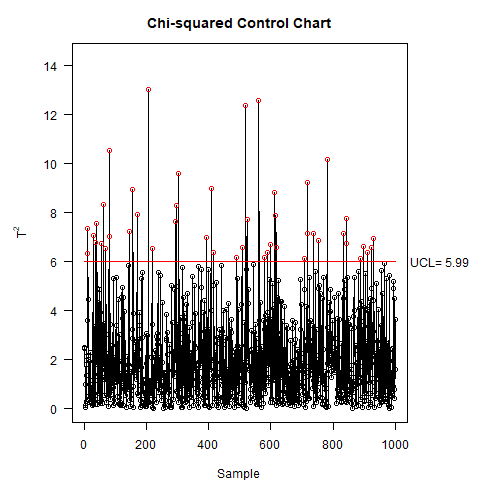

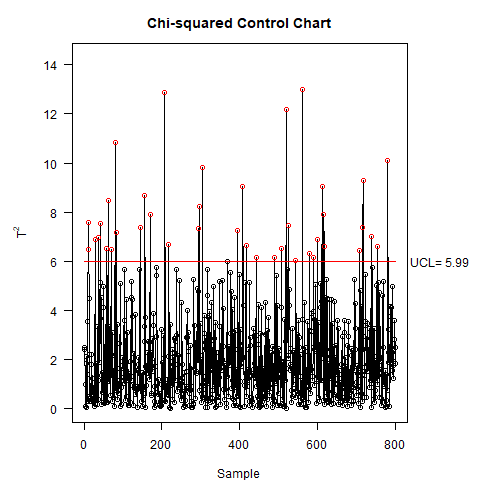

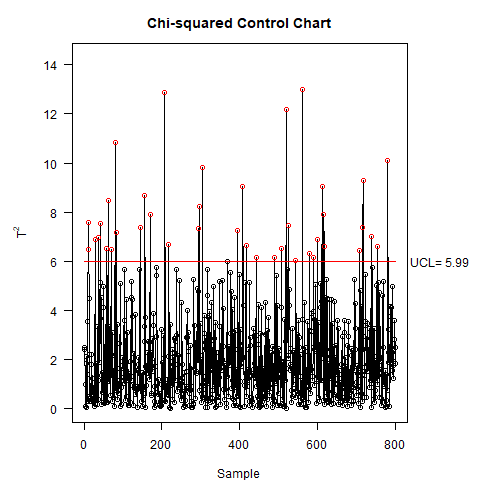

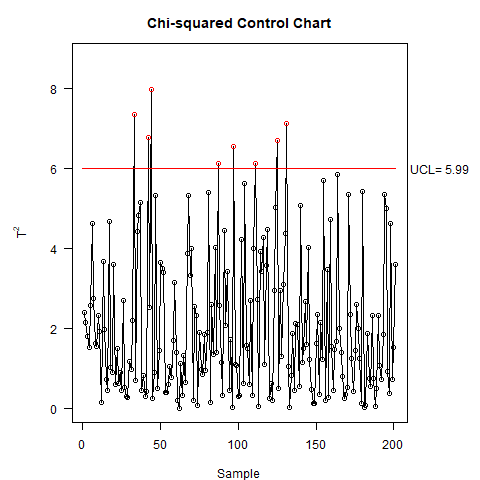

In [35]:
%%R

mult.chart(X, type = "chi", alpha = 0.05)

# differenciating between Phase I and Phase II
# choose a set of data for phase I and use the calculated mean and covariance in phase II
vec <- (mult.chart(X[1:800,], type="chi", alpha=0.05)$Xmv)
mat <- (mult.chart(X[1:800,], type="chi", alpha=0.05)$covariance)

mult.chart(X[800:1000,], type="chi", Xmv=vec, S=mat, alpha=0.05)



Hotelling's $T^2$ chart

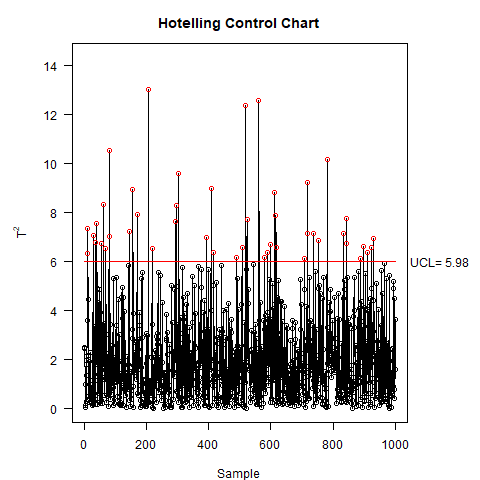

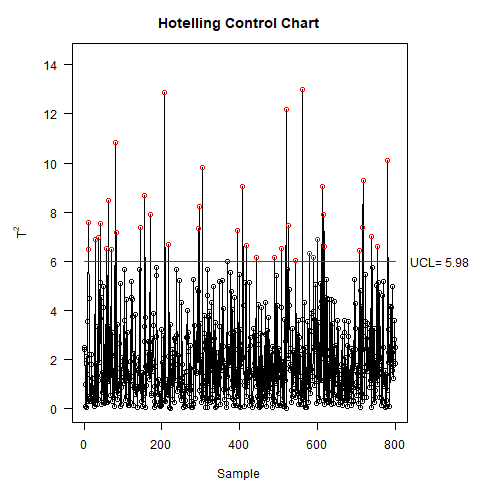

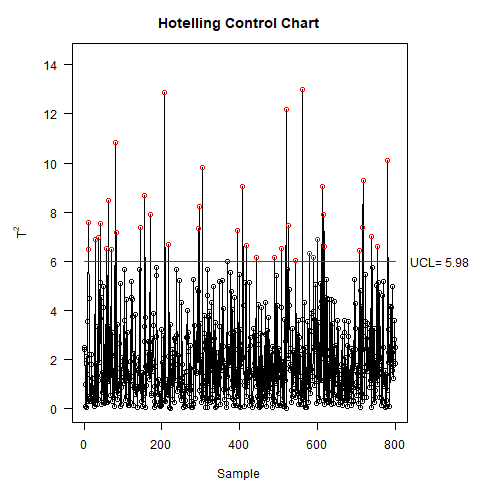

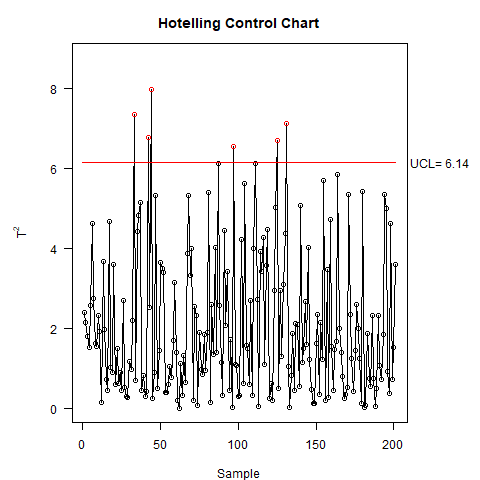

In [36]:
%%R

mult.chart(X, type="t2", method="sw", alpha=0.05)

# differenciating between Phase I and Phase II
# choose a set of data for phase I and use the calculated mean and covariance in phase II
vec <- (mult.chart(X[1:800,], type="t2", alpha=0.05)$Xmv)
mat <- (mult.chart(X[1:800,], type="t2", alpha=0.05)$covariance)

mult.chart(X[800:1000,], type="t2", Xmv=vec, S=mat, alpha=0.05)

Multivariate EWMA control chart

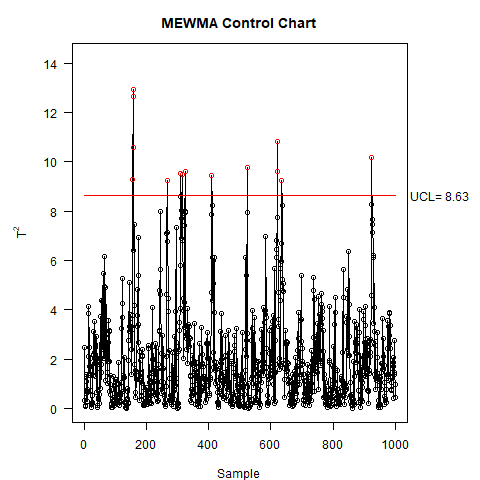

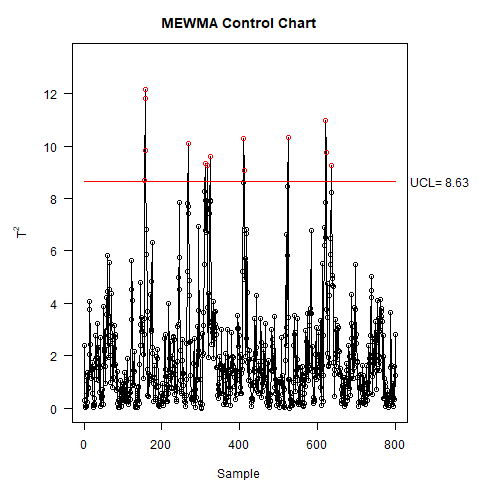

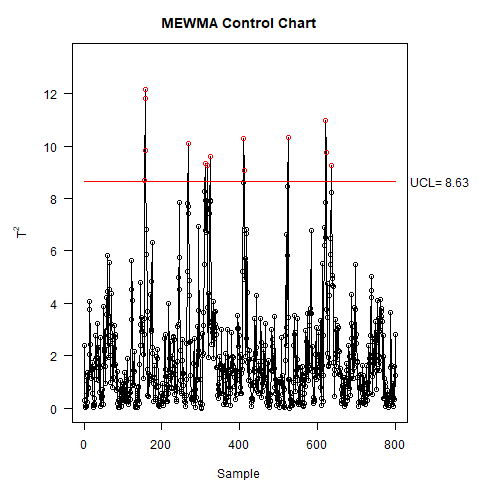

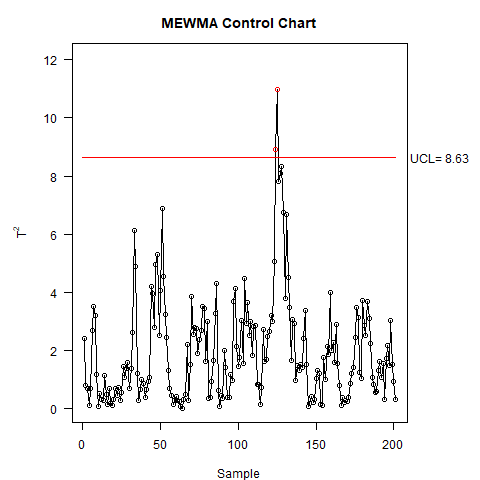

In [37]:
%%R

mult.chart(X, type="mewma")

# differenciating between Phase I and Phase II
# choose a set of data for phase I and use the calculated mean and covariance in phase II
vec <- (mult.chart(X[1:800,], type="mewma", alpha=0.05)$Xmv)
mat <- (mult.chart(X[1:800,], type="mewma", alpha=0.05)$covariance)

mult.chart(X[800:1000,], type="mewma", Xmv=vec, S=mat, alpha=0.05)

Multivariate CUMSUM

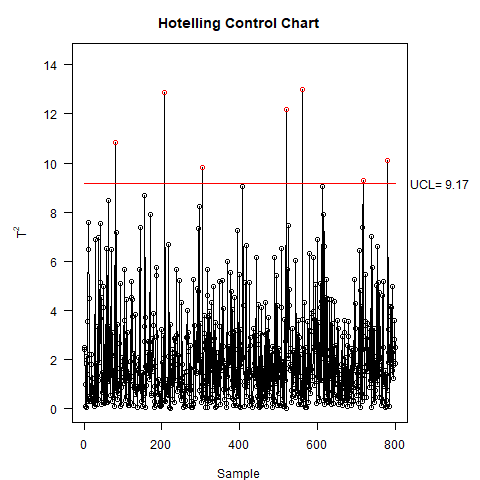

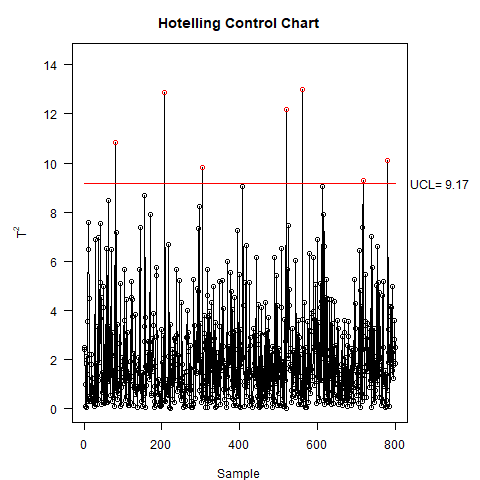

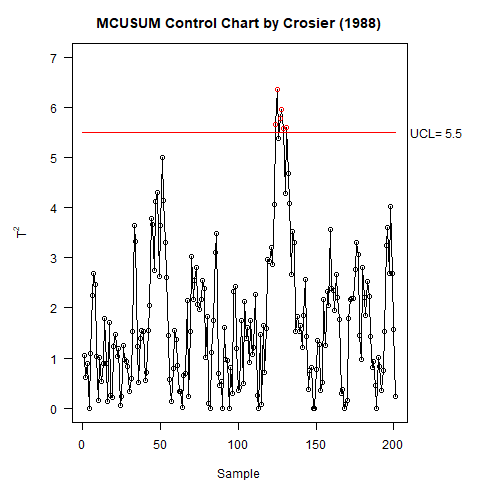

In [38]:
%%R

# calculate the sample mean and covariance in phase I
Xmv <- mult.chart(X[1:800,], type="t2")$Xmv
S <- mult.chart(X[1:800,], type="t2")$covariance

# calculate mcumsum in phase II
mult.chart(X[800:1000,], type="mcusum", Xmv=Xmv, S=S)

## **Case Study**
### Simulation of a Phase I and Phase II correlated process and application of control charts

#### Phase I:

Imagine we have a process that we want to monitor. In Phase I we collect data under what we believe are Normality conditions. Then we perform a process control test on the data and obtain the control limits.

In [39]:
# p-value
alpha = 0.01

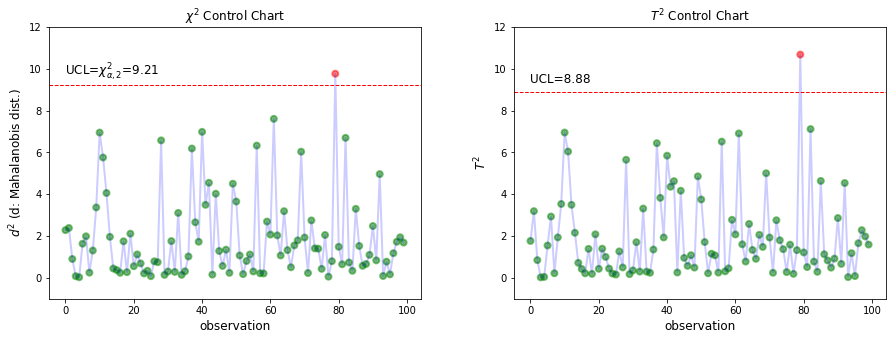

In [40]:
np.random.seed(10)

# _____ Phase I _____
n1 = 100

mu = np.array([5.0, 0.0])
sx = 1; sy = 1; sxy = -0.94;
Sigma = np.array([[1, sxy/(sx*sy)],
                  [sxy/(sx*sy),  1.]])

# store mean and covariance from phase I
mu_I = mu; Sigma_I = Sigma;

# random samples (phase I)
X1 = np.random.multivariate_normal(mu, Sigma, size=n1)

nvar = X1.shape[1]

# Hotelling's T2 statistic:
T2 = Hotelling(X1)

# Hotelling's UCL:
UCL = Hotelling_UCL(n1, nvar, alpha=alpha, phase='I')

# Mahalanobis distance
d = Mahalanobis(X1, mu, Sigma)

# Chi2 UCL given p-value:
chi2 = stats.chi2.ppf(1-alpha, 2)

# Plot chi2 and T2 chart together
fig = plt.figure(figsize=(15,5), facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.25)

ax1 = plt.subplot(gs[0:1, 0:1]) # chi2
ax2 = plt.subplot(gs[0:1, 1:2]) # T2

# plot Chi2 chart:
t = np.arange(0, n1, 1)
col = np.where(d**2 <= chi2,'g', 'r')
ax1.scatter(t, d**2, c=col, lw=2, alpha=0.5)
ax1.plot(t, d**2, 'b-', lw=2, alpha=0.2)
ax1.axhline(y=chi2, xmin=0, xmax=n1, ls='--', c='r', lw=1)
ax1.text(0, chi2*1.05, r'UCL=$\chi_{\alpha, 2}^2$='+'{:.3}'.format(chi2), fontsize=12)
ax1.set_xlabel("observation", fontsize=12)
ax1.set_ylabel("$d^2$ (d: Mahalanobis dist.)", fontsize=12)
ax1.set_title("$\chi^2$ Control Chart")
ax1.set_ylim(-1,12)

# plot Hotelling(X) chart:
t = np.arange(0, n1, 1)
col = np.where(T2 <= UCL,'g', 'r')
ax2.scatter(t, T2, c=col, lw=2, alpha=0.5)
ax2.plot(t, T2, 'b-', lw=2, alpha=0.2)
ax2.axhline(y=UCL, xmin=0, xmax=n1, ls='--', c='r', lw=1)
ax2.text(0, UCL*1.05, s='UCL='+'{:.3}'.format(UCL), fontsize=12)
ax2.set_xlabel("observation", fontsize=12)
ax2.set_ylabel("$T^2$", fontsize=12)
ax2.set_title("$T^2$ Control Chart")
ax2.set_ylim(-1,12)

plt.show()

Control charts in phase I from R library MSQC:

In [41]:
# load data X1 in the R environment
%R -i X1
%R -i alpha

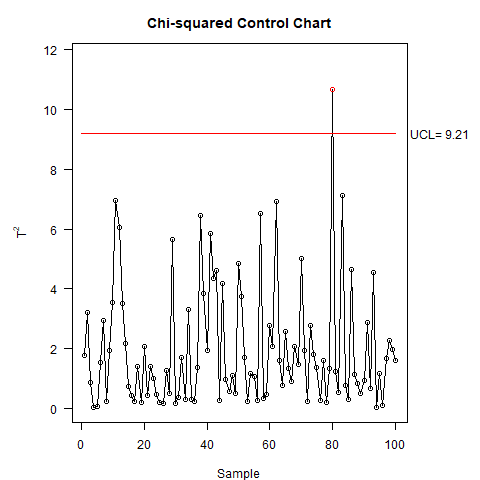

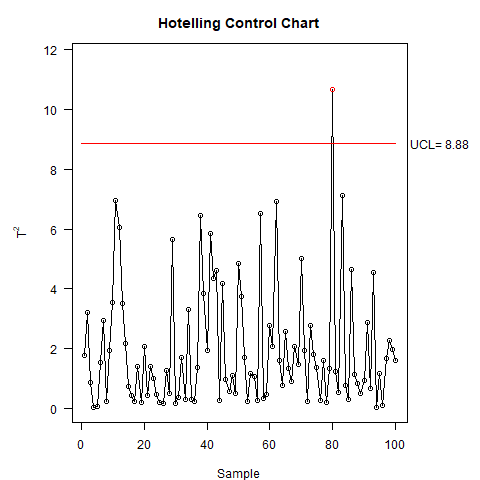

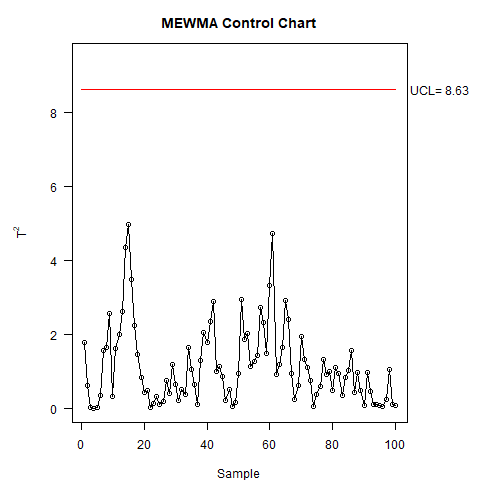

In [42]:
%%R

q1 <- mult.chart(X1, type="chi", alpha=alpha)
q2 <- mult.chart(X1, type="t2", alpha=alpha)
q3 <- mult.chart(X1, type="mewma")

#### Phase II

Being the process in control, the mean vector and the covariance matrix from Phase I are now used to monitor the process in future production (Phase II). New samples are obtained and the computation of the statistics using the `in-control` sample mean and covariance matrix is as follows:

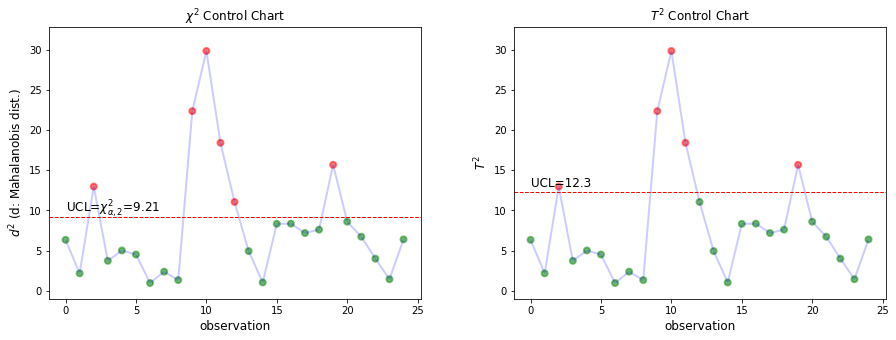

In [43]:
np.random.seed(10)

# _____ Phase II _____
n2 = 25

# new data mean and covariance
mu = np.array([3.5, 1.0])
sx = 1.25; sy = 1.05; sxy = -0.9;
Sigma = np.array([[1, sxy/(sx*sy)],
                  [sxy/(sx*sy),  1.]])

# random samples (phase II)
X2 = np.random.multivariate_normal(mu, Sigma, size=n2)

nvar = X2.shape[1]

# Hotelling's T2 statistic
# new data with phase I mean and cov
T2 = Hotelling(X2, mu_I, Sigma_I)

#  Hotelling's UCL:
UCL = Hotelling_UCL(n2, nvar, alpha=alpha, phase='II')

# Mahalanobis distance
d = Mahalanobis(X2, mu_I, Sigma_I)

# Chi2 UCL given p-value:
chi2 = stats.chi2.ppf(1-alpha, nvar)

# Plot chi2 and T2 chart together
fig = plt.figure(figsize=(15,5), facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.25)

ax1 = plt.subplot(gs[0:1, 0:1]) # chi2
ax2 = plt.subplot(gs[0:1, 1:2]) # T2

# plot Chi2 chart:
t = np.arange(0, n2, 1)
col = np.where(d**2 <= chi2,'g', 'r')
ax1.scatter(t, d**2, c=col, lw=2, alpha=0.5)
ax1.plot(t, d**2, 'b-', lw=2, alpha=0.2)
ax1.axhline(y=chi2, xmin=0, xmax=n2, ls='--', c='r', lw=1)
ax1.text(0, chi2*1.05, r'UCL=$\chi_{\alpha, 2}^2$='+'{:.3}'.format(chi2), fontsize=12)
ax1.set_xlabel("observation", fontsize=12)
ax1.set_ylabel("$d^2$ (d: Mahalanobis dist.)", fontsize=12)
ax1.set_title("$\chi^2$ Control Chart")
ax1.set_ylim(-1, max(d**2)+max(d**2)/10)

# plot Hotelling chart:
t = np.arange(0, n2, 1)
col = np.where(T2 <= UCL,'g', 'r')
ax2.scatter(t, T2, c=col, lw=2, alpha=0.5)
ax2.plot(t, T2, 'b-', lw=2, alpha=0.2)
ax2.axhline(y=UCL, xmin=0, xmax=n2, ls='--', c='r', lw=1)
ax2.text(0, UCL*1.05, s='UCL='+'{:.3}'.format(UCL), fontsize=12)
ax2.set_xlabel("observation", fontsize=12)
ax2.set_ylabel("$T^2$", fontsize=12)
ax2.set_title("$T^2$ Control Chart")
ax2.set_ylim(-1, max(T2)+max(T2)/10)

plt.show()

In [44]:
# load data X2 in the R environment
%R -i X2

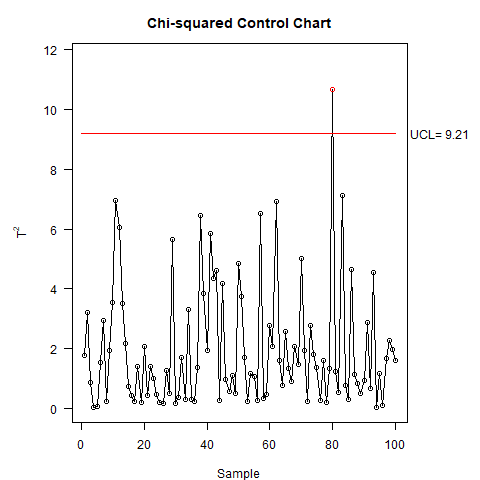

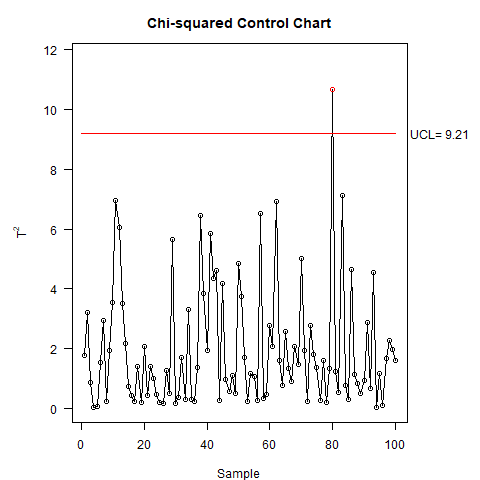

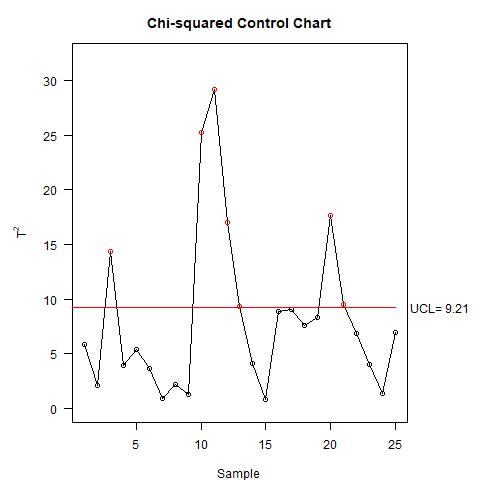

In [45]:
%%R

vec <- mult.chart(X1, type="chi", alpha=alpha)$Xmv
mat <- mult.chart(X1, type="chi", alpha=alpha)$covariance
mult.chart(X2, type="chi", Xmv=vec, S=mat, alpha=alpha)

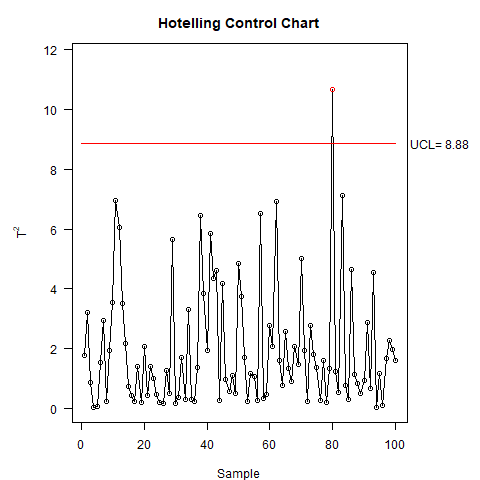

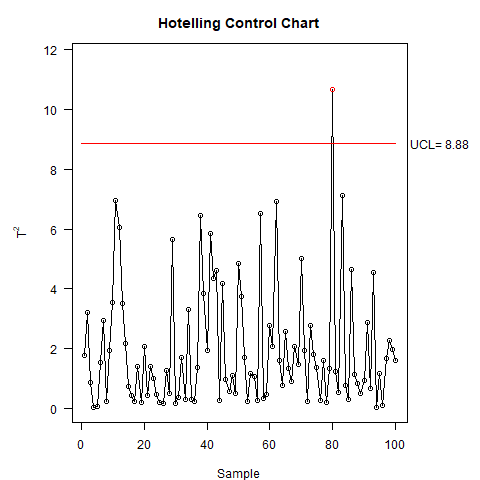

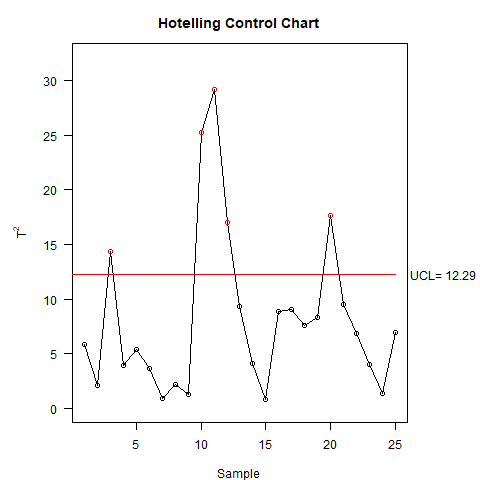

In [46]:
%%R

vec <- mult.chart(X1, type="t2", alpha=alpha)$Xmv
mat <- mult.chart(X1, type="t2", alpha=alpha)$covariance
mult.chart(X2, type="t2", Xmv=vec, S=mat, alpha=alpha)